In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df=pd.read_csv("./drive/MyDrive/Football/Jours_indispo-Python.csv")
df.head()

,PRENOM,NOM,EQUIPES,POSTE,Moment,SEMAINE,JOUR,Date,PERIODE,Séance,...,Dist V> 15 km/h,Nb Acc >3 m/s/s,Dist Acc >3 m/s/s,Nb Dec <-3 m/s/s,Dist Dec <-3 m/s/s,Nb Explosive Move,Explosive Distance,Duration,Smax,JOURS INDISPONIBLES
0,D,D,PROS,LATERAL,Après-midi,25,ENT,6/19/2020,PREPA,Séance 1,...,140.0,6.0,54.08,7.0,33.0,1.0,38.0,77.64,6.0,0
1,G,G,PROS,MILIEU OFFENSIF,Après-midi,25,ENT,6/19/2020,PREPA,Séance 1,...,167.0,10.0,63.44,4.0,36.0,5.0,63.0,77.60,6.3,0
2,H,H,PROS,ATTAQUANT,Après-midi,25,ENT,6/19/2020,PREPA,Séance 1,...,208.0,22.0,74.88,10.0,42.0,8.0,68.0,77.64,6.4,0
3,A,A,PROS,MILIEU DEFENSIF,Journée,25,REPOS,6/20/2020,PREPA,Repos 1,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0
4,B,B,PROS,DEFENSEUR CENTRAL,Journée,25,REPOS,6/20/2020,PREPA,Repos 1,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0


# EDA Exploration des données

In [ ]:
## Pour afficher toutes les colonnes de votre dataset
pd.set_option('display.max_column',30)
df.head()

,PRENOM,NOM,EQUIPES,POSTE,Moment,SEMAINE,JOUR,Date,PERIODE,Séance,Player Name,Distance totale,Avg Met Power,Dist / min,Dist V 15-20 km/h,Nb V 15-20 km/h,Dist V 20-25 km/h,Nb V 20-25 km/h,Dist V >25 km/h,Nb V >25 km/h,Dist V> 15 km/h,Nb Acc >3 m/s/s,Dist Acc >3 m/s/s,Nb Dec <-3 m/s/s,Dist Dec <-3 m/s/s,Nb Explosive Move,Explosive Distance,Duration,Smax,JOURS INDISPONIBLES
0,D,D,PROS,LATERAL,Après-midi,25,ENT,6/19/2020,PREPA,Séance 1,D,4456.0,4.9,57.0,135.0,23.0,5.0,1.0,0.0,0.0,140.0,6.0,54.08,7.0,33.0,1.0,38.0,77.64,6.0,0
1,G,G,PROS,MILIEU OFFENSIF,Après-midi,25,ENT,6/19/2020,PREPA,Séance 1,G,4528.0,5.0,58.0,128.0,17.0,40.0,5.0,0.0,0.0,167.0,10.0,63.44,4.0,36.0,5.0,63.0,77.60,6.3,0
2,H,H,PROS,ATTAQUANT,Après-midi,25,ENT,6/19/2020,PREPA,Séance 1,H,4749.0,5.2,61.0,179.0,28.0,28.0,4.0,0.0,0.0,208.0,22.0,74.88,10.0,42.0,8.0,68.0,77.64,6.4,0
3,A,A,PROS,MILIEU DEFENSIF,Journée,25,REPOS,6/20/2020,PREPA,Repos 1,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0
4,B,B,PROS,DEFENSEUR CENTRAL,Journée,25,REPOS,6/20/2020,PREPA,Repos 1,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0


In [ ]:
## eliminer une colonne dans un dataframe ET axis = 1 pour supprimier les colonnes
df = df.drop(['PRENOM','EQUIPES ', 'Moment','JOUR ','Séance','PERIODE','Player Name'], axis=1)
df.head()

,NOM,POSTE,SEMAINE,Date,Distance totale,Avg Met Power,Dist / min,Dist V 15-20 km/h,Nb V 15-20 km/h,Dist V 20-25 km/h,Nb V 20-25 km/h,Dist V >25 km/h,Nb V >25 km/h,Dist V> 15 km/h,Nb Acc >3 m/s/s,Dist Acc >3 m/s/s,Nb Dec <-3 m/s/s,Dist Dec <-3 m/s/s,Nb Explosive Move,Explosive Distance,Duration,Smax,JOURS INDISPONIBLES
0,D,LATERAL,25,6/19/2020,4456.0,4.9,57.0,135.0,23.0,5.0,1.0,0.0,0.0,140.0,6.0,54.08,7.0,33.0,1.0,38.0,77.64,6.0,0
1,G,MILIEU OFFENSIF,25,6/19/2020,4528.0,5.0,58.0,128.0,17.0,40.0,5.0,0.0,0.0,167.0,10.0,63.44,4.0,36.0,5.0,63.0,77.60,6.3,0
2,H,ATTAQUANT,25,6/19/2020,4749.0,5.2,61.0,179.0,28.0,28.0,4.0,0.0,0.0,208.0,22.0,74.88,10.0,42.0,8.0,68.0,77.64,6.4,0
3,A,MILIEU DEFENSIF,25,6/20/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0
4,B,DEFENSEUR CENTRAL,25,6/20/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0


In [ ]:
## calcul Nbre Lignes , Colonnes
df.shape

(9584, 23)

In [ ]:
df.describe()

,SEMAINE,Distance totale,Avg Met Power,Dist / min,Dist V 15-20 km/h,Nb V 15-20 km/h,Dist V 20-25 km/h,Nb V 20-25 km/h,Dist V >25 km/h,Nb V >25 km/h,Dist V> 15 km/h,Nb Acc >3 m/s/s,Dist Acc >3 m/s/s,Nb Dec <-3 m/s/s,Dist Dec <-3 m/s/s,Nb Explosive Move,Explosive Distance,Duration,Smax,JOURS INDISPONIBLES
count,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000
mean,27.537354,3531.502643,4.283128,47.104706,336.746087,34.139277,124.241653,10.160580,23.477236,1.694943,484.275285,15.651597,69.022286,15.585028,56.876078,6.373226,79.580342,44.698776,4.343385,0.092237
std,15.665070,3296.756996,3.859707,42.767090,450.405233,43.004660,214.246469,15.714655,56.432030,3.927429,669.007770,22.663247,74.279374,24.173267,64.006256,15.393064,102.097477,40.306971,3.685656,0.289375
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,3809.000000,5.500000,59.000000,180.000000,21.000000,23.000000,2.000000,0.000000,0.000000,230.000000,8.000000,57.690000,7.000000,43.000000,1.000000,43.500000,55.250000,6.300000,0.000000
75%,41.000000,6056.750000,7.200000,79.000000,522.000000,56.000000,158.000000,15.000000,18.000000,1.000000,722.000000,23.000000,117.520000,22.000000,97.000000,6.000000,129.000000,81.517500,7.580000,0.000000
max,54.000000,13130.000000,18.600000,230.000000,4665.000000,379.000000,2136.000000,101.000000,670.000000,35.000000,4665.000000,148.000000,568.000000,171.000000,444.000000,120.000000,627.000000,149.390000,10.280000,1.000000


In [ ]:
## identifier le type de variables 
## ou sont les variables quantitatives et qualitatives
## quels types de variables on retrouve dans notre data set
df.dtypes

NOM                     object
POSTE                   object
SEMAINE                  int64
Date                    object
Distance totale        float64
Avg Met Power          float64
Dist / min             float64
Dist V 15-20 km/h      float64
Nb V 15-20 km/h        float64
Dist V 20-25 km/h      float64
Nb V 20-25 km/h        float64
Dist V >25 km/h        float64
Nb V >25 km/h          float64
Dist V> 15 km/h        float64
Nb Acc >3 m/s/s        float64
Dist Acc >3 m/s/s      float64
Nb Dec <-3 m/s/s       float64
Dist Dec <-3 m/s/s     float64
Nb Explosive Move      float64
Explosive Distance     float64
Duration               float64
Smax                   float64
JOURS INDISPONIBLES      int64
dtype: object

In [ ]:
## on voit qu'il y a des possibiltés de transformations
## Date pourra être converti en date time
## Nom et poste pourront être converti en numeric

In [ ]:
##pour compter le nbre de variables que l'on a 
## on peut voir ci dessous 18 valeurs quantitatives et 5 qualitatives
df.dtypes.value_counts()

float64    18
object      3
int64       2
dtype: int64

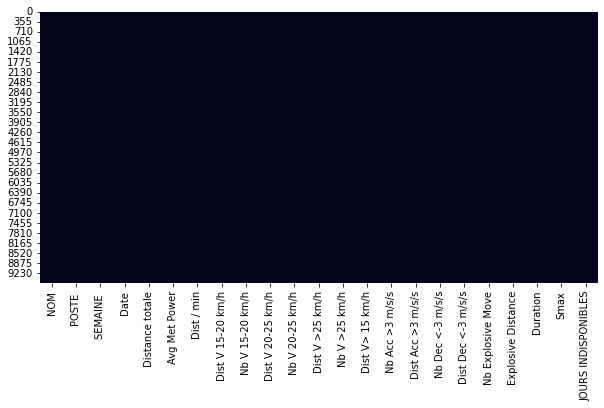

In [ ]:
### Analyser les valeurs manquantes
##isna fonction qui vérifie les valeurs manquantes
df.isna()
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
## observation de la valeur Target
## on voit que pour notre Target on a la catégorie postive et nul
df['JOURS INDISPONIBLES'].unique()

array([0, 1])

In [ ]:
## voir la difference entre le nombre de Valeurs blesses et sans blessures (Valeur Target)
## on voit qu'il 8700 lignes avec 0 donc pas de blessures et 884 lignes avec 1 blessures
df['JOURS INDISPONIBLES'].value_counts()

0    8700
1     884
Name: JOURS INDISPONIBLES, dtype: int64

In [ ]:
## donc on peut affirmer que nos classes ne sont pas équilibrées donc sans doute utiliser différentes métriques comme le score F1 la sensibilité..
## on a que 10% de jours indisponibles cumulés par joueurs
## pour afficher en pourcentage écrire Normalize = True
df['JOURS INDISPONIBLES'].value_counts(normalize=True)

0    0.907763
1    0.092237
Name: JOURS INDISPONIBLES, dtype: float64

In [ ]:
df.describe()

,SEMAINE,Distance totale,Avg Met Power,Dist / min,Dist V 15-20 km/h,Nb V 15-20 km/h,Dist V 20-25 km/h,Nb V 20-25 km/h,Dist V >25 km/h,Nb V >25 km/h,Dist V> 15 km/h,Nb Acc >3 m/s/s,Dist Acc >3 m/s/s,Nb Dec <-3 m/s/s,Dist Dec <-3 m/s/s,Nb Explosive Move,Explosive Distance,Duration,Smax,JOURS INDISPONIBLES
count,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000
mean,27.537354,3531.502643,4.283128,47.104706,336.746087,34.139277,124.241653,10.160580,23.477236,1.694943,484.275285,15.651597,69.022286,15.585028,56.876078,6.373226,79.580342,44.698776,4.343385,0.092237
std,15.665070,3296.756996,3.859707,42.767090,450.405233,43.004660,214.246469,15.714655,56.432030,3.927429,669.007770,22.663247,74.279374,24.173267,64.006256,15.393064,102.097477,40.306971,3.685656,0.289375
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,3809.000000,5.500000,59.000000,180.000000,21.000000,23.000000,2.000000,0.000000,0.000000,230.000000,8.000000,57.690000,7.000000,43.000000,1.000000,43.500000,55.250000,6.300000,0.000000
75%,41.000000,6056.750000,7.200000,79.000000,522.000000,56.000000,158.000000,15.000000,18.000000,1.000000,722.000000,23.000000,117.520000,22.000000,97.000000,6.000000,129.000000,81.517500,7.580000,0.000000
max,54.000000,13130.000000,18.600000,230.000000,4665.000000,379.000000,2136.000000,101.000000,670.000000,35.000000,4665.000000,148.000000,568.000000,171.000000,444.000000,120.000000,627.000000,149.390000,10.280000,1.000000


In [ ]:
## dissocier Valeurs 1 et 0 Lignes indisponibles dans le df
## création de sous ensembles Blessés et non blesssés
jours_blessure= df[df['JOURS INDISPONIBLES'] ==1]
Jours_dispo= df[df['JOURS INDISPONIBLES'] ==0]


In [ ]:
## associer valeurs quantitatives de Distances avec la création d'un column spécifique
Distance_col = ['Distance totale', 'Dist / min', 'Dist V 15-20 km/h', 'Dist V 20-25 km/h', 'Dist V >25 km/h', 
                'Dist V> 15 km/h', 'Dist Acc >3 m/s/s',
                'Dist Dec <-3 m/s/s','Explosive Distance']

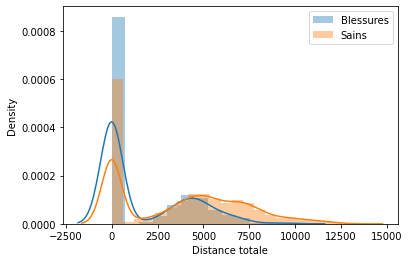

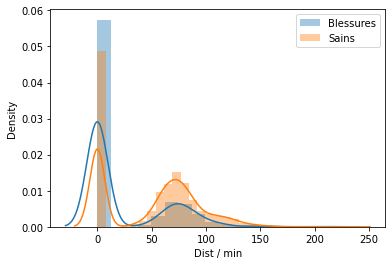

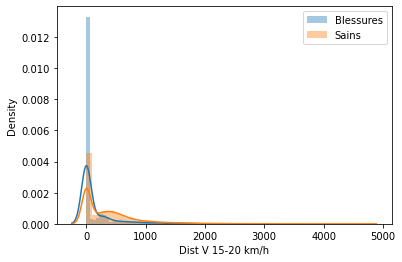

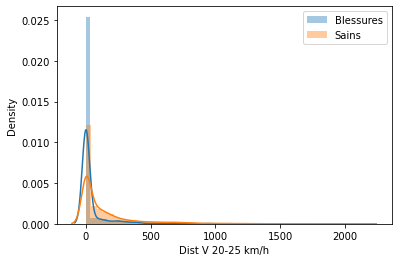

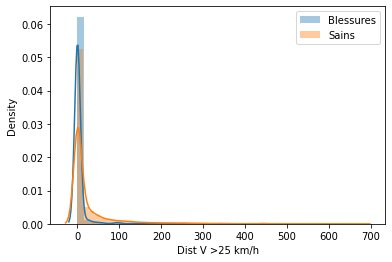

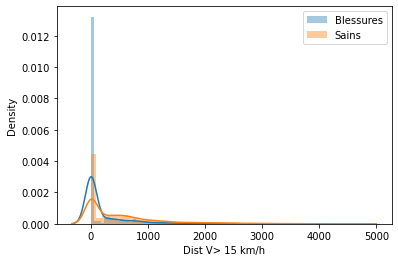

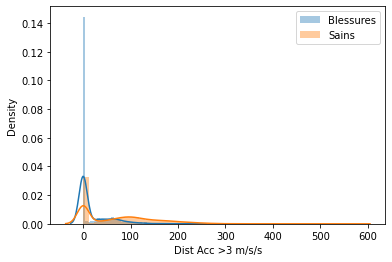

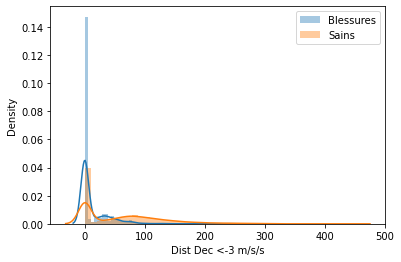

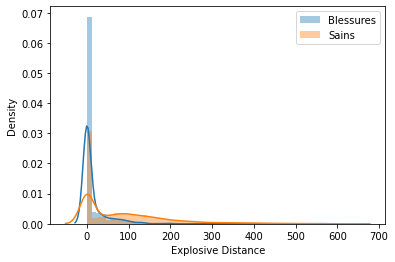

In [ ]:
## on cherche à obtenir la distribution de nos données dans chacune des colonnes
## on utilise seaborn
## on voit qu'il y a des variables symétriques et d'autres asymétriques
## on va séparer les cas qui sont bléssés et non blessés
## On peut voir pour la Variable distance totale que les Joueurs Blessés ont des perf différentes que le joueurs non blessés
## on vérifie plus tard cette hypothèse
for col in Distance_col:
    plt.figure()
    sns.distplot(jours_blessure[col], label = 'Blessures')
    sns.distplot(Jours_dispo[col], label = 'Sains')
    plt.legend()

In [ ]:
## associer valeurs quantitatives de Nbre avec la création d'une colonne spécifique
Nb_col = ['Nb V 15-20 km/h', 'Nb V 20-25 km/h', 'Nb V >25 km/h', 
                'Nb Acc >3 m/s/s',
                'Nb Dec <-3 m/s/s', 'Nb Explosive Move']

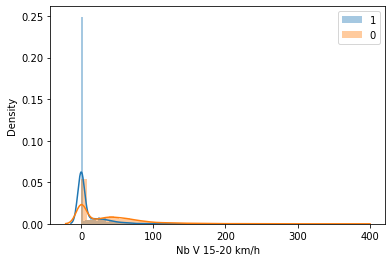

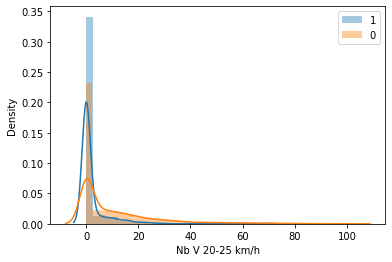

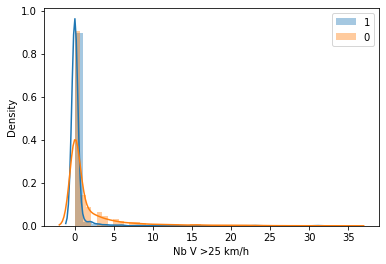

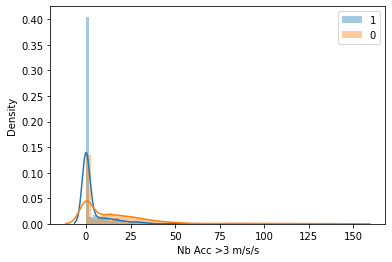

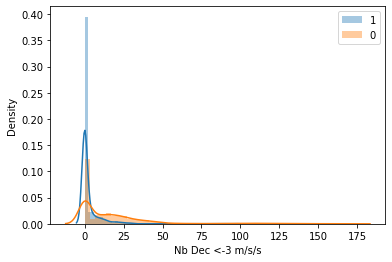

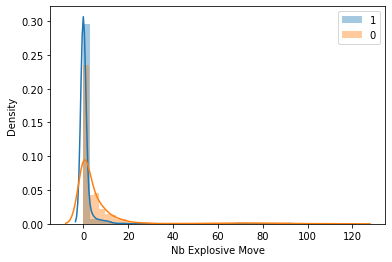

In [ ]:
for col in Nb_col:
    plt.figure()
    sns.distplot(jours_blessure[col], label = 1)
    sns.distplot(Jours_dispo[col], label = 0)
    plt.legend()

In [ ]:
Nrj_Col = ['Avg Met Power', 'Duration', 'Smax'] 
Nrj_Col

['Avg Met Power', 'Duration', 'Smax']

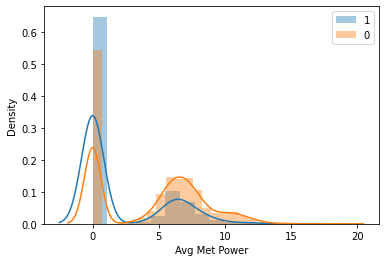

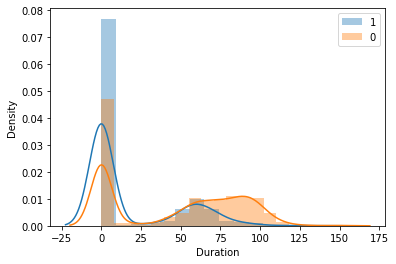

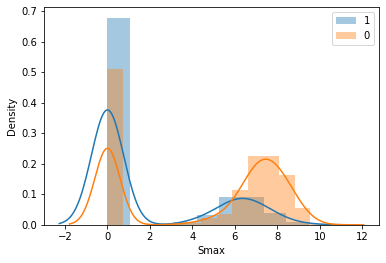

In [ ]:
## on cherche à obtenir la distribution de nos données dans chacune des colonnes
## on utilise seaborn
## on voit qu'il y a des variables symétriques et d'autres asymétriques
for col in Nrj_Col:
    plt.figure()
    sns.distplot(jours_blessure[col], label = 1)
    sns.distplot(Jours_dispo[col], label = 0)
    plt.legend()

In [ ]:
Key_columns = ['POSTE ','NOM', 'SEMAINE ','Date', 'JOURS INDISPONIBLES']

In [ ]:
df = df[Key_columns + Distance_col + Nb_col + Nrj_Col]
df.head()

,POSTE,NOM,SEMAINE,Date,JOURS INDISPONIBLES,Distance totale,Dist / min,Dist V 15-20 km/h,Dist V 20-25 km/h,Dist V >25 km/h,Dist V> 15 km/h,Dist Acc >3 m/s/s,Dist Dec <-3 m/s/s,Explosive Distance,Nb V 15-20 km/h,Nb V 20-25 km/h,Nb V >25 km/h,Nb Acc >3 m/s/s,Nb Dec <-3 m/s/s,Nb Explosive Move,Avg Met Power,Duration,Smax
0,LATERAL,D,25,6/19/2020,0,4456.0,57.0,135.0,5.0,0.0,140.0,54.08,33.0,38.0,23.0,1.0,0.0,6.0,7.0,1.0,4.9,77.64,6.0
1,MILIEU OFFENSIF,G,25,6/19/2020,0,4528.0,58.0,128.0,40.0,0.0,167.0,63.44,36.0,63.0,17.0,5.0,0.0,10.0,4.0,5.0,5.0,77.60,6.3
2,ATTAQUANT,H,25,6/19/2020,0,4749.0,61.0,179.0,28.0,0.0,208.0,74.88,42.0,68.0,28.0,4.0,0.0,22.0,10.0,8.0,5.2,77.64,6.4
3,MILIEU DEFENSIF,A,25,6/20/2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,DEFENSEUR CENTRAL,B,25,6/20/2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


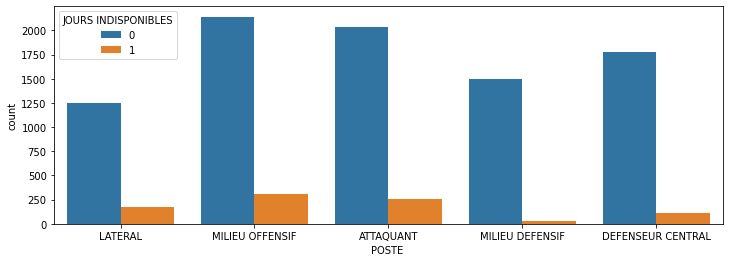

In [ ]:
## On voit que certains poste sont plus touchés par les blessures
plt.figure(figsize=(12,4)) 
sns.countplot(x='POSTE ', hue= 'JOURS INDISPONIBLES', data=df)

In [ ]:
## comparaisons variables Target avec variables qualitatives
pd.crosstab(df['JOURS INDISPONIBLES'], df['POSTE '])

POSTE,ATTAQUANT,DEFENSEUR CENTRAL,LATERAL,MILIEU DEFENSIF,MILIEU OFFENSIF
JOURS INDISPONIBLES,,,,,
0,2034,1775,1250,1500,2141
1,254,115,171,32,312


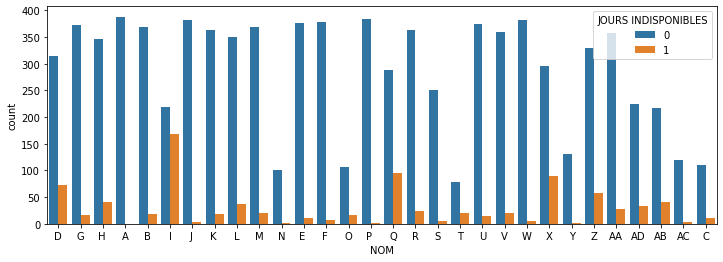

In [ ]:
## On voit que certains joueurs sont plus sujets aux blessures - c'est très rare de ne pas se blesser
plt.figure(figsize=(12,4)) 
sns.countplot(x='NOM', hue= 'JOURS INDISPONIBLES', data=df)

In [ ]:
## comparaisons variables Target avec variables qualitatives
pd.crosstab(df['JOURS INDISPONIBLES'], df['NOM'])

NOM,A,AA,AB,AC,AD,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
JOURS INDISPONIBLES,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,388,357,217,119,224,368,111,315,377,379,372,347,219,382,363,350,368,101,106,383,288,364,251,79,374,360,381,296,131,330
1,0,28,40,3,33,18,10,73,10,8,16,41,169,3,19,38,20,1,16,2,96,24,5,21,14,21,6,90,1,58


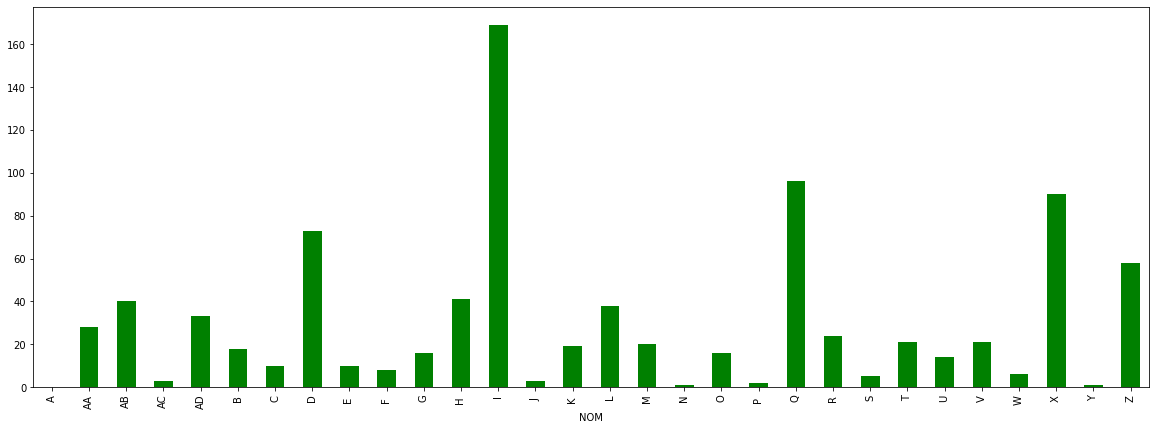

In [ ]:
df_player = df.groupby(['NOM'], as_index=True) ['JOURS INDISPONIBLES'].sum().plot(kind="bar",width = 0.5, color = 'Green',figsize = (20,7))
df_player

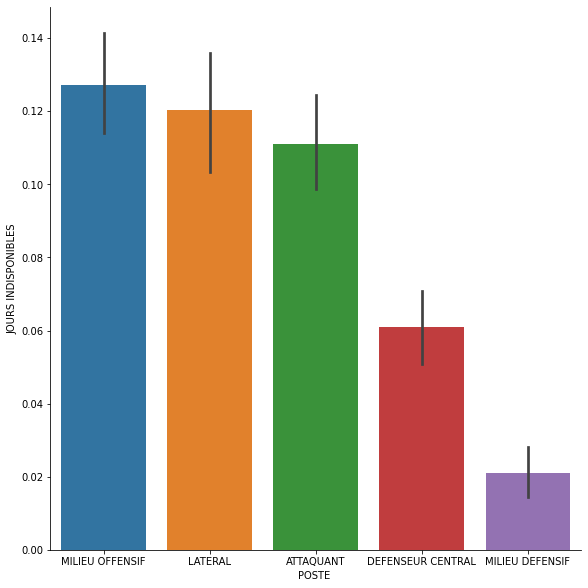

In [ ]:
Poste_order = ['MILIEU OFFENSIF','LATERAL','ATTAQUANT', 'DEFENSEUR CENTRAL', 'MILIEU DEFENSIF']
sns.catplot(x="POSTE ", y="JOURS INDISPONIBLES",data=df, kind="bar", height=8.27, order=Poste_order);

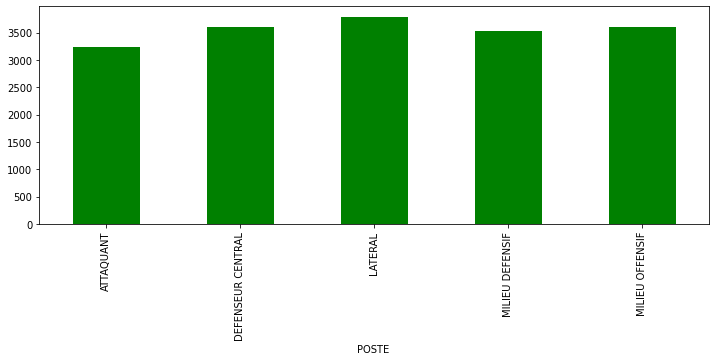

In [ ]:
Season_Poste_Dist = df.groupby(['POSTE '], as_index=True) ['Distance totale'].mean().plot(kind="bar",width = 0.5, color = 'Green',figsize = (12,4)) 

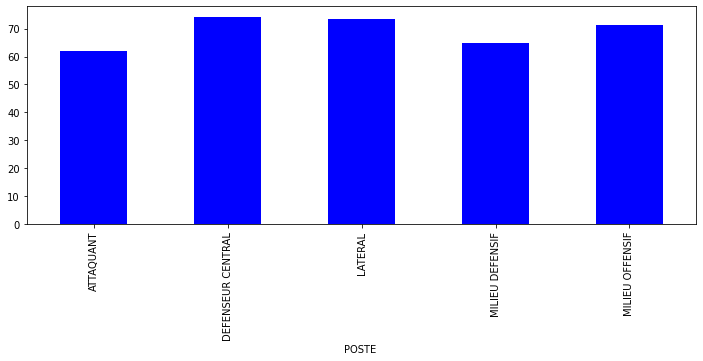

In [ ]:
Season_Poste_Acc = df.groupby(['POSTE '], as_index=True) ['Dist Acc >3 m/s/s'].mean().plot(kind="bar",width = 0.5, color = 'Blue',figsize = (12,4))

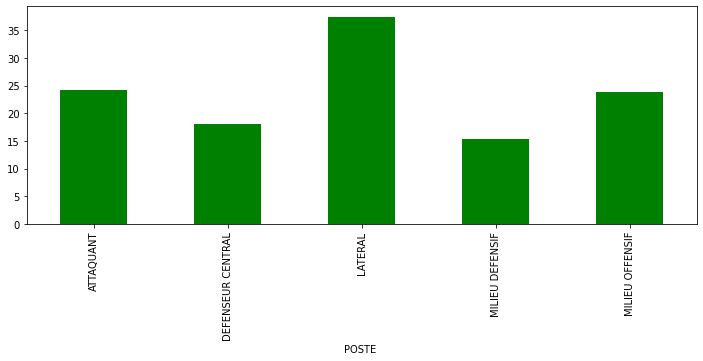

In [ ]:
Season_Poste_25kmh = df.groupby(['POSTE '], as_index=True) ['Dist V >25 km/h'].mean().plot(kind="bar",width = 0.5, color = 'Green',figsize = (12,4))

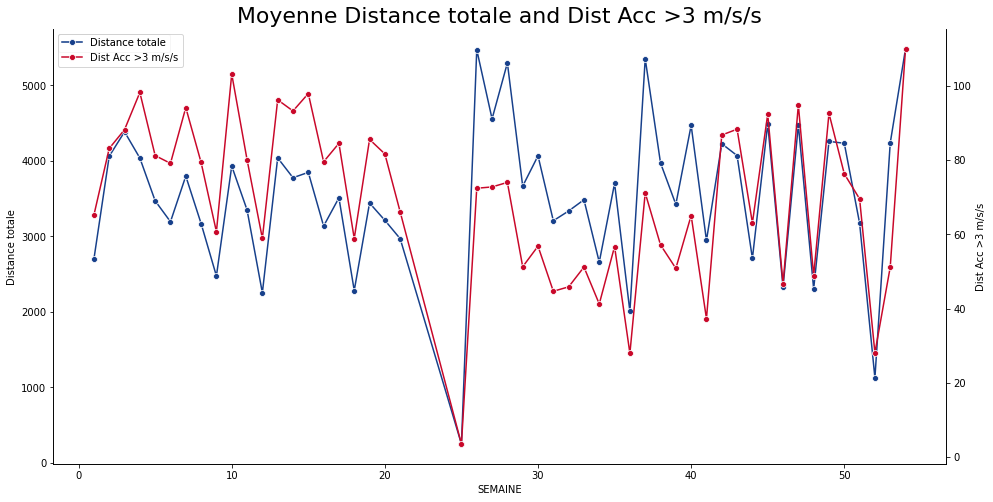

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()

sns.lineplot(x=df['SEMAINE '], y='Distance totale', data=df, marker="o", ax=ax, ci=None, label='Distance totale', color='#17408b')
sns.lineplot(x=df['SEMAINE '], y='Dist Acc >3 m/s/s', data=df, marker="o", ax=ax2, ci=None, label='Dist Acc >3 m/s/s', color='#c9082a')

plt.title('Moyenne Distance totale and Dist Acc >3 m/s/s', fontsize=22)
ax.xaxis.set_label_text('SEMAINE')
ax.yaxis.set_label_text('Distance totale')
ax2.yaxis.set_label_text('Dist Acc >3 m/s/s')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()

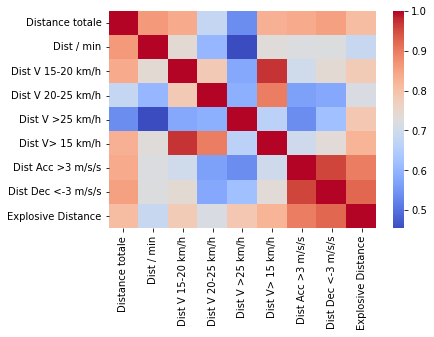

In [ ]:
## On regarde s'il y a des variables entre elles qui sont très corrélées 
## elles nous aiderons peut être pour la suite à prendre des décisions
sns.heatmap(df[Distance_col].corr(), cmap='coolwarm')

In [ ]:
df.corr()['JOURS INDISPONIBLES'].sort_values()

Dist Dec <-3 m/s/s    -0.222634
Dist Acc >3 m/s/s     -0.220850
Smax                  -0.218095
Duration              -0.213480
Explosive Distance    -0.205348
Avg Met Power         -0.189660
Nb V 15-20 km/h       -0.188344
Distance totale       -0.182077
Dist / min            -0.180288
Nb Dec <-3 m/s/s      -0.173450
Nb Acc >3 m/s/s       -0.168711
Nb V 20-25 km/h       -0.162076
Dist V> 15 km/h       -0.146792
Dist V 15-20 km/h     -0.142873
Dist V 20-25 km/h     -0.128079
Nb V >25 km/h         -0.119669
Nb Explosive Move     -0.114368
Dist V >25 km/h       -0.109705
SEMAINE                0.070855
JOURS INDISPONIBLES    1.000000
Name: JOURS INDISPONIBLES, dtype: float64

In [ ]:
jours_blessure.shape

(884, 23)

In [ ]:
Jours_dispo.shape

(8700, 23)

## PRE PROCESSING
## TRAIN / TEST SPLIT
## ENCODER AND SCALER

In [ ]:
features_list = ['POSTE ','Dist V >25 km/h','Distance totale','Dist Acc >3 m/s/s','Dist Dec <-3 m/s/s','Explosive Distance', 'Avg Met Power', 
                 'Duration', 'Smax', 'Nb V 15-20 km/h', 'Nb V 20-25 km/h', 'Nb V >25 km/h', 
                'Nb Acc >3 m/s/s',
                'Nb Dec <-3 m/s/s', 'Nb Explosive Move']
X = df.loc[:,features_list]
y = df.loc[:,'JOURS INDISPONIBLES']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y,)

In [ ]:
y_train.value_counts()

0    6960
1     707
Name: JOURS INDISPONIBLES, dtype: int64

In [ ]:
y_test.value_counts()

0    1740
1     177
Name: JOURS INDISPONIBLES, dtype: int64

##ENCODAGE NETTOYAGE

In [ ]:
### Training pipeline ###
print("--- Training pipeline ---")
print()  

# Encoding categorical features and standardizing numeric features

print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables


numeric_features = [1,2,3,4,5,6,7,8,9,10,11,12,13] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [0] 
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

--- Training pipeline ---

#### X_train BEFORE preprocessing ####
                 POSTE   Dist V >25 km/h  Distance totale  Dist Acc >3 m/s/s  \
2788    MILIEU OFFENSIF             28.0           3417.0              42.64   
6989    MILIEU OFFENSIF            112.0           9885.0             170.88   
6821  DEFENSEUR CENTRAL              0.0           1117.0              17.86   
5301    MILIEU OFFENSIF              0.0           4383.0              26.28   
6011  DEFENSEUR CENTRAL              6.0           6799.0             144.00   

      Dist Dec <-3 m/s/s  Explosive Distance  Avg Met Power  Duration  Smax  \
2788                41.0                97.0            4.1     72.86  7.50   
6989               194.0               273.0           11.1     81.59  7.92   
6821                17.0                14.0           10.6      9.62  6.36   
5301                 6.0                25.0            9.9     36.81  6.67   
6011               104.0               179.0            7.

## ENTRAINEMENT DE MODELE DE MACHINE LEARNING
## LOGISTIC REGRESSION

In [ ]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


In [ ]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[0 0 0 0 0]



In [ ]:
### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)

print("...Done.")
print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

--- Testing pipeline ---
Standardizing numerical features...
                 POSTE   Dist V >25 km/h  Distance totale  Dist Acc >3 m/s/s  \
3555  DEFENSEUR CENTRAL              0.0           3496.0              87.00   
5330  DEFENSEUR CENTRAL              0.0              0.0               0.00   
3913  DEFENSEUR CENTRAL              0.0              0.0               0.00   
9155    MILIEU OFFENSIF             30.0           6880.0             130.42   
2143          ATTAQUANT             19.0           4827.0              56.16   
...                 ...              ...              ...                ...   
5361    MILIEU DEFENSIF              0.0              0.0               0.00   
1967  DEFENSEUR CENTRAL              0.0              0.0               0.00   
2812    MILIEU OFFENSIF              0.0           3623.0              60.32   
6602  DEFENSEUR CENTRAL              1.0           3527.0             144.00   
1052    MILIEU OFFENSIF             12.0           5260.0  

--- Assessment of performances ---


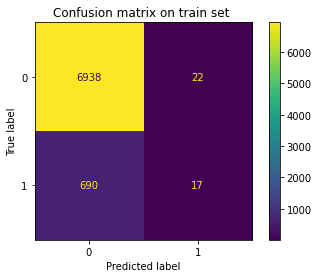

accuracy-score on train set :  0.9071344724142428


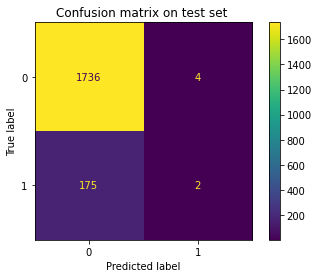

accuracy-score on test set :  0.9066249347939489


In [ ]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = plot_confusion_matrix(classifier, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = plot_confusion_matrix(classifier, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [ ]:
# Check coefficients 

print("coefficients are: ", classifier.coef_) 
print("Constant is: ", classifier.intercept_)

# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

# Print numerical columns
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

# Append all columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
print("All column names are: ",all_column_names)

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":classifier.coef_.squeeze() # CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})

feature_importance


coefficients are:  [[ 0.37060063 -0.22236704  0.64285724 -1.41395737  0.61092445  0.46180617
   1.08659978  0.68419265 -0.99339935 -2.70020593 -0.34844103 -0.80459341
   0.52798694 -0.0614297  -0.18391606  0.32254585  0.77166333 -0.66339698]]
Constant is:  [-3.49133056]
All transformers are:  [('cat', OneHotEncoder(), [0]), ('num', StandardScaler(), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]), ('remainder', 'drop', [14])]
One Hot Encoder transformer is:  OneHotEncoder()
Categorical columns are:  [array(['ATTAQUANT', 'DEFENSEUR CENTRAL', 'LATERAL', 'MILIEU DEFENSIF',
       'MILIEU OFFENSIF'], dtype=object)]
numerical columns are:  Index(['Dist V >25 km/h', 'Distance totale', 'Dist Acc >3 m/s/s',
       'Dist Dec <-3 m/s/s', 'Explosive Distance', 'Avg Met Power', 'Duration',
       'Smax', 'Nb V 15-20 km/h', 'Nb V 20-25 km/h', 'Nb V >25 km/h',
       'Nb Acc >3 m/s/s', 'Nb Dec <-3 m/s/s'],
      dtype='object')
All column names are:  ['ATTAQUANT' 'DEFENSEUR CENTRAL' 'LATERAL' 'MILIEU D

,feature_names,coefficients
0,ATTAQUANT,0.370601
1,DEFENSEUR CENTRAL,-0.222367
2,LATERAL,0.642857
3,MILIEU DEFENSIF,-1.413957
4,MILIEU OFFENSIF,0.610924
5,Dist V >25 km/h,0.461806
6,Distance totale,1.086600
7,Dist Acc >3 m/s/s,0.684193
8,Dist Dec <-3 m/s/s,-0.993399
9,Explosive Distance,-2.700206


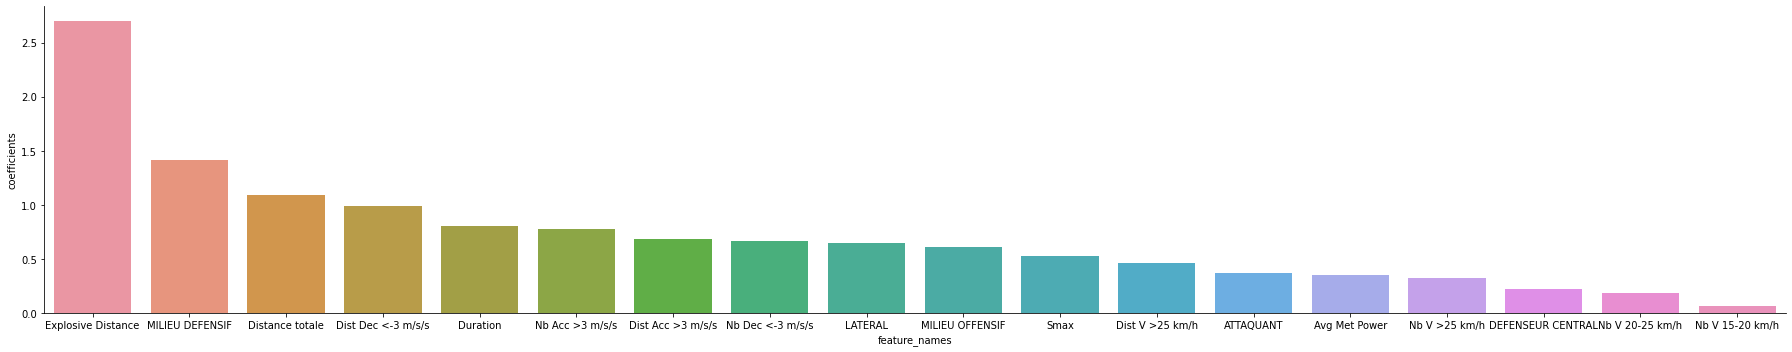

In [ ]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=100/20) # Resize graph

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation (model):
  model.fit (X_train, y_train)
  ypred=model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring ='f1', train_sizes=np.linspace(0.1, 1, 10))
  plt.figure (figsize=(12,8))
  plt.plot(N, train_score.mean(axis=1), label ='train score')
  plt.plot(N, val_score.mean(axis=1), label ='validation score')
  plt.legend()

[[1736    4]
 [ 175    2]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1740
           1       0.33      0.01      0.02       177

    accuracy                           0.91      1917
   macro avg       0.62      0.50      0.49      1917
weighted avg       0.86      0.91      0.87      1917



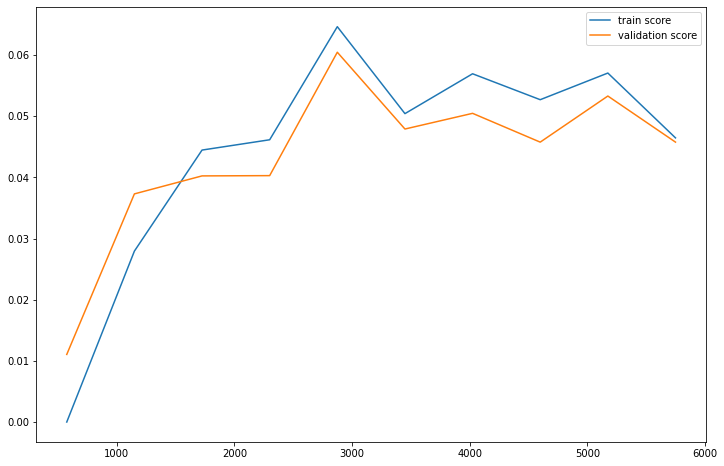

In [ ]:
evaluation(model)

In [ ]:
model = LogisticRegression(class_weight="balanced")

In [ ]:
def evaluation (model):
  model.fit (X_train, y_train)
  ypred=model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring ='f1', train_sizes=np.linspace(0.1, 1, 10))
  plt.figure (figsize=(12,8))
  plt.plot(N, train_score.mean(axis=1), label ='train score')
  plt.plot(N, val_score.mean(axis=1), label ='validation score')
  plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[1069  671]
 [  22  155]]
              precision    recall  f1-score   support

           0       0.98      0.61      0.76      1740
           1       0.19      0.88      0.31       177

    accuracy                           0.64      1917
   macro avg       0.58      0.75      0.53      1917
weighted avg       0.91      0.64      0.71      1917



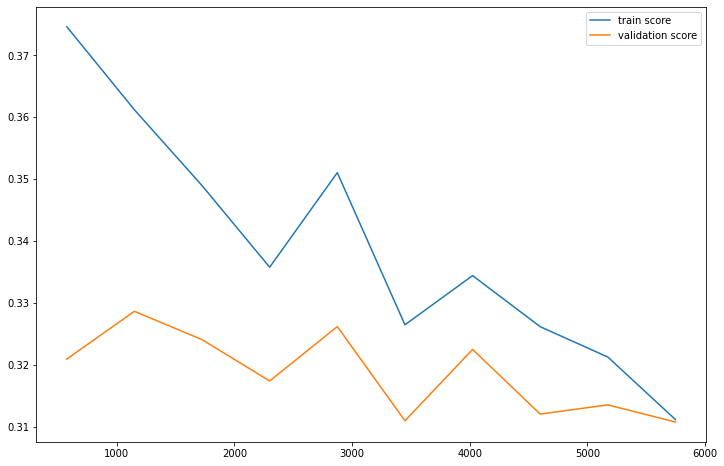

In [ ]:
evaluation(model)

## ENTRAINEMENT DE MODELE DE MACHINE LEARNING
## DECISION TREE

In [ ]:
# Training model
print("Training model...")
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [ ]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



--- Assessment of performances ---


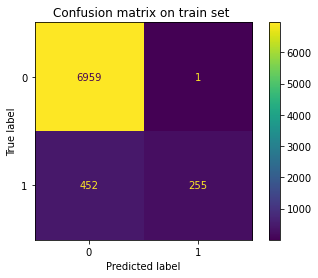

accuracy-score on train set :  0.9409156123646798


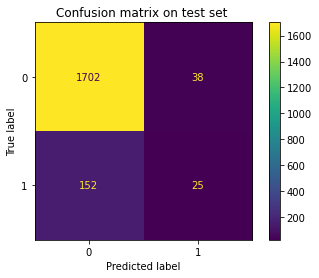

accuracy-score on test set :  0.900886802295253


In [ ]:
### Assessment of performances ###
print("--- Assessment of performances ---")


# Plot confusion matrix
cm = plot_confusion_matrix(classifier, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = plot_confusion_matrix(classifier, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [ ]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
                                        
})

feature_importance

,feature_names,coefficients
0,ATTAQUANT,0.013645
1,DEFENSEUR CENTRAL,0.023274
2,LATERAL,0.006214
3,MILIEU DEFENSIF,0.043679
4,MILIEU OFFENSIF,0.019017
5,Dist V >25 km/h,0.028012
6,Distance totale,0.171844
7,Dist Acc >3 m/s/s,0.061261
8,Dist Dec <-3 m/s/s,0.206423
9,Explosive Distance,0.081070


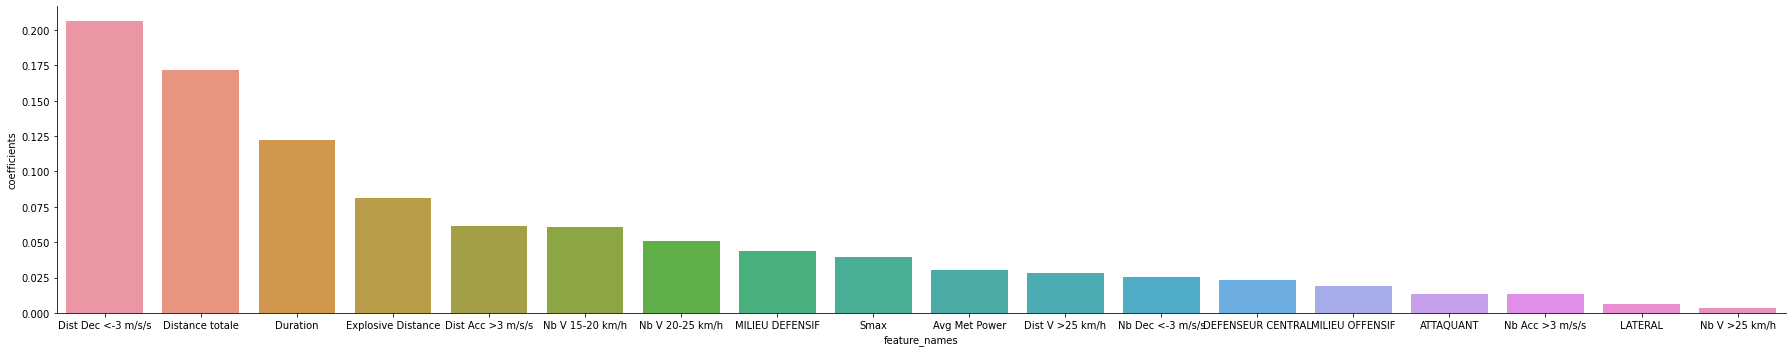

In [ ]:
# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=300/60) # Resize graph

In [ ]:
model = DecisionTreeClassifier(class_weight="balanced")

In [ ]:
def evaluation (model):
  model.fit (X_train, y_train)
  ypred=model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring ='f1', train_sizes=np.linspace(0.1, 1, 10))
  plt.figure (figsize=(12,8))
  plt.plot(N, train_score.mean(axis=1), label ='train score')
  plt.plot(N, val_score.mean(axis=1), label ='validation score')
  plt.legend()


[[1325  415]
 [  51  126]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1740
           1       0.23      0.71      0.35       177

    accuracy                           0.76      1917
   macro avg       0.60      0.74      0.60      1917
weighted avg       0.90      0.76      0.80      1917



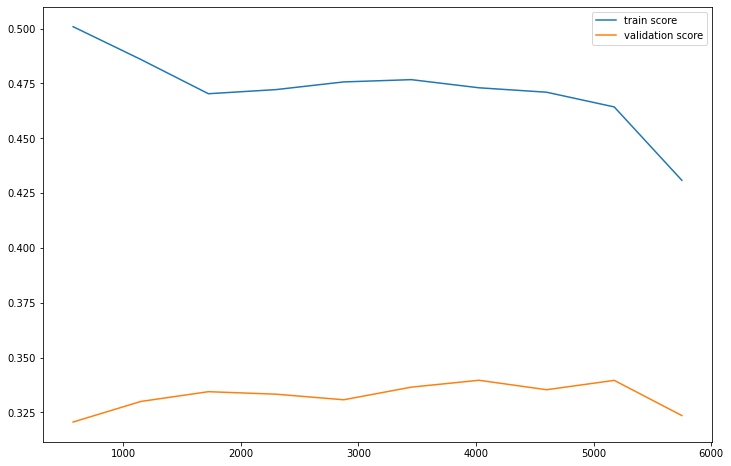

In [ ]:
evaluation(model)

In [ ]:
## sur 1740 lignes négatives on a pu identifier 1323 lignes négatives avec  417 lignes érronnées "VOUS ETES BLESSES!"
## donc ca nous donne une precision de 96% et un recall donc précision de 76% pour les gens négatifs
## et pour les gens positifs sur les 177 lignes postives de blessures on a pu identifier 116 lignes positives et incorrectement rejetee 61 lignes 'personnes' 
## donc parmis les 177 lignes joueurs positifs on a pu identifier 116 ce qui nous donne
## un recall de 66% ce qui veut dire qu'on a identifier 66% des cas blessés
## le f1_score est un très bon rapport entre la précision et le recall et donc nous permet de comprendre si notre modele arrive à la fois à bien identifier les blessures et les non blessés

## ENTRAINEMENT DE MODELE DE MACHINE LEARNING
## RandomForestClassifier

In [ ]:
# Training model
print("Training model...")
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [ ]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [ ]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



--- Assessment of performances ---


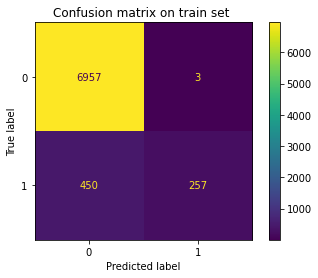

accuracy-score on train set :  0.9409156123646798


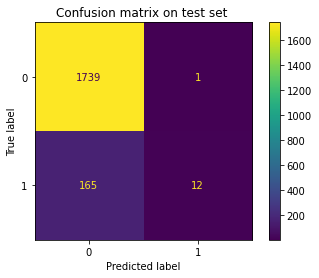

accuracy-score on test set :  0.9134063641105895


In [ ]:
### Assessment of performances ###
print("--- Assessment of performances ---")


# Plot confusion matrix
cm = plot_confusion_matrix(classifier, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = plot_confusion_matrix(classifier, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [ ]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
                                        
})

feature_importance

,feature_names,coefficients
0,ATTAQUANT,0.013386
1,DEFENSEUR CENTRAL,0.016705
2,LATERAL,0.017136
3,MILIEU DEFENSIF,0.032456
4,MILIEU OFFENSIF,0.019912
5,Dist V >25 km/h,0.023859
6,Distance totale,0.170770
7,Dist Acc >3 m/s/s,0.074952
8,Dist Dec <-3 m/s/s,0.098139
9,Explosive Distance,0.099824


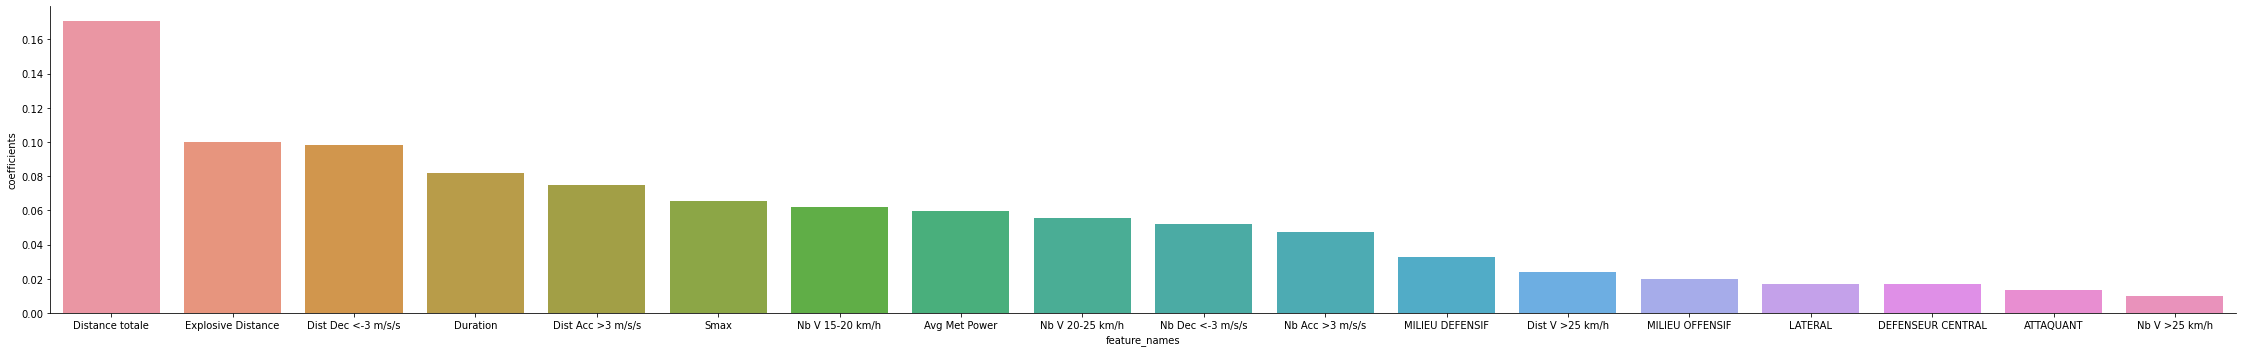

In [ ]:
# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=50/8) # Resize graph

In [ ]:
model = RandomForestClassifier(class_weight="balanced")

In [ ]:
def evaluation (model):
  model.fit (X_train, y_train)
  ypred=model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring ='f1', train_sizes=np.linspace(0.1, 1, 10))
  plt.figure (figsize=(12,8))
  plt.plot(N, train_score.mean(axis=1), label ='train score')
  plt.plot(N, val_score.mean(axis=1), label ='validation score')
  plt.legend()


[[1352  388]
 [  61  116]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1740
           1       0.23      0.66      0.34       177

    accuracy                           0.77      1917
   macro avg       0.59      0.72      0.60      1917
weighted avg       0.89      0.77      0.81      1917



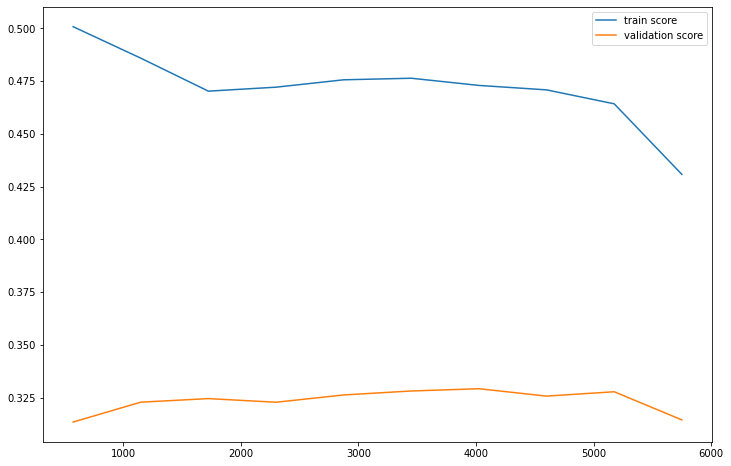

In [ ]:
evaluation(model)